In [1]:
import pandas as pd
import pyensembl
import os
import scipy.stats as stats
from plotnine import *

# Data loading

In [2]:
dir_eQTL='/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/processed_data/Finemapping/Z/'
dir_pip='/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/processed_data/Finemapping/output/'

In [3]:
eqtl_data=pd.DataFrame(columns=['rs_id_dbSNP151_GRCh38p7','gene_id'])
pip_data=pd.DataFrame(columns=['rs_id_dbSNP151_GRCh38p7','gene_id'])
for folder in os.listdir(dir_pip):
    print('Starting with tissue',folder)
    tissue_pip=pd.DataFrame()
    tissue_eQTL=pd.DataFrame()
    for pipfile in os.listdir(dir_pip+folder):
        if pipfile.startswith('ENSG'):
            gene=pipfile.split('_')[0]
            eQTL=pd.read_csv(dir_eQTL+folder+'/'+gene+'_z.csv',sep='\t',skiprows=1,names=['rs_id_dbSNP151_GRCh38p7','Z_'+folder])
            eQTL['rs_id_dbSNP151_GRCh38p7']=eQTL['rs_id_dbSNP151_GRCh38p7'].str.strip().astype(str)
            pip=pd.read_csv(dir_pip+folder+'/'+pipfile,sep='\t',skiprows=1,names=['rs_id_dbSNP151_GRCh38p7','pip_'+folder])
            pip['rs_id_dbSNP151_GRCh38p7']=pip['rs_id_dbSNP151_GRCh38p7'].str.strip().astype(str)
            pip['gene_id']=gene
            eQTL['gene_id']=gene
            tissue_pip=pd.concat([tissue_pip,pip])
            tissue_eQTL=pd.concat([tissue_eQTL,eQTL])
    eqtl_data=eqtl_data.merge(tissue_eQTL,how='outer')
    pip_data=pip_data.merge(tissue_pip,how='outer')


Starting with tissue Adipose_Subcutaneous
Starting with tissue Adipose_Visceral_Omentum
Starting with tissue Adrenal_Gland
Starting with tissue Artery_Aorta
Starting with tissue Artery_Coronary
Starting with tissue Artery_Tibial
Starting with tissue Brain_Amygdala
Starting with tissue Brain_Anterior_cingulate_cortex_BA24
Starting with tissue Brain_Caudate_basal_ganglia
Starting with tissue Brain_Cerebellar_Hemisphere
Starting with tissue Brain_Cerebellum
Starting with tissue Brain_Cortex
Starting with tissue Brain_Frontal_Cortex_BA9
Starting with tissue Brain_Hippocampus
Starting with tissue Brain_Hypothalamus
Starting with tissue Brain_Nucleus_accumbens_basal_ganglia
Starting with tissue Brain_Putamen_basal_ganglia
Starting with tissue Brain_Spinal_cord_cervical_c-1
Starting with tissue Brain_Substantia_nigra
Starting with tissue Breast_Mammary_Tissue
Starting with tissue Cells_Cultured_fibroblasts
Starting with tissue Cells_EBV-transformed_lymphocytes
Starting with tissue Colon_Sigmo

# Crude correlations

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
def eqtl_heatmap(dataset):
    plt.figure(figsize=(15, 15))
    corr = dataset.corr()
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );
    return ax


In [57]:
eqtl_data.corr()

,Z_Adipose_Subcutaneous,Z_Adipose_Visceral_Omentum,Z_Adrenal_Gland,Z_Artery_Aorta,Z_Artery_Coronary,Z_Artery_Tibial,Z_Brain_Amygdala,Z_Brain_Anterior_cingulate_cortex_BA24,Z_Brain_Caudate_basal_ganglia,Z_Brain_Cerebellar_Hemisphere,...,Z_Skin_Not_Sun_Exposed_Suprapubic,Z_Skin_Sun_Exposed_Lower_leg,Z_Small_Intestine_Terminal_Ileum,Z_Spleen,Z_Stomach,Z_Testis,Z_Thyroid,Z_Uterus,Z_Vagina,Z_Whole_Blood
Z_Adipose_Subcutaneous,1.000000,0.069623,0.005367,0.139840,0.009411,0.074248,-0.001019,-0.001687,0.133031,0.005453,...,0.016949,0.067662,0.003605,0.092981,0.080321,0.056064,0.079159,-0.001651,-0.002716,0.108327
Z_Adipose_Visceral_Omentum,0.069623,1.000000,0.042391,0.052547,0.040307,0.153431,0.007850,0.000542,0.037289,0.030977,...,0.062749,0.067081,0.019030,0.065995,0.055382,0.048322,0.054050,0.000877,0.000137,0.044778
Z_Adrenal_Gland,0.005367,0.042391,1.000000,0.020615,0.066889,0.004397,0.029639,0.029130,0.094937,0.053938,...,0.041205,0.028875,0.041276,0.094202,0.091292,0.061713,0.162527,0.020672,0.007680,0.006239
Z_Artery_Aorta,0.139840,0.052547,0.020615,1.000000,0.038250,0.090885,0.029942,-0.001259,0.206723,0.066487,...,0.027244,0.038805,0.108043,0.022771,0.073058,-0.080806,0.062058,0.020143,0.013671,0.029054
Z_Artery_Coronary,0.009411,0.040307,0.066889,0.038250,1.000000,0.015047,0.054558,0.016001,0.066276,0.064787,...,0.254660,0.007653,0.079951,0.051143,0.040916,0.033734,0.074461,0.039213,0.034393,0.017082
Z_Artery_Tibial,0.074248,0.153431,0.004397,0.090885,0.015047,1.000000,0.005029,0.004934,0.008978,0.009183,...,0.001581,0.062562,0.001291,0.030239,0.065202,0.035561,0.053532,-0.000789,-0.005276,0.025225
Z_Brain_Amygdala,-0.001019,0.007850,0.029639,0.029942,0.054558,0.005029,1.000000,0.124628,0.052022,0.114389,...,0.005630,0.003728,0.061654,0.030380,0.060570,-0.008105,0.000220,0.075042,0.034796,0.002763
Z_Brain_Anterior_cingulate_cortex_BA24,-0.001687,0.000542,0.029130,-0.001259,0.016001,0.004934,0.124628,1.000000,0.103539,0.070954,...,-0.006167,0.001132,0.025399,0.018495,0.002881,0.004542,-0.007230,0.096323,0.120054,0.010742
Z_Brain_Caudate_basal_ganglia,0.133031,0.037289,0.094937,0.206723,0.066276,0.008978,0.052022,0.103539,1.000000,0.083218,...,0.026657,0.008096,0.095704,0.035463,0.133643,0.048428,0.056185,0.100525,0.061189,0.029738
Z_Brain_Cerebellar_Hemisphere,0.005453,0.030977,0.053938,0.066487,0.064787,0.009183,0.114389,0.070954,0.083218,1.000000,...,0.017101,0.010626,0.161198,0.026846,0.004554,0.015126,0.006808,0.042896,0.013551,0.007400


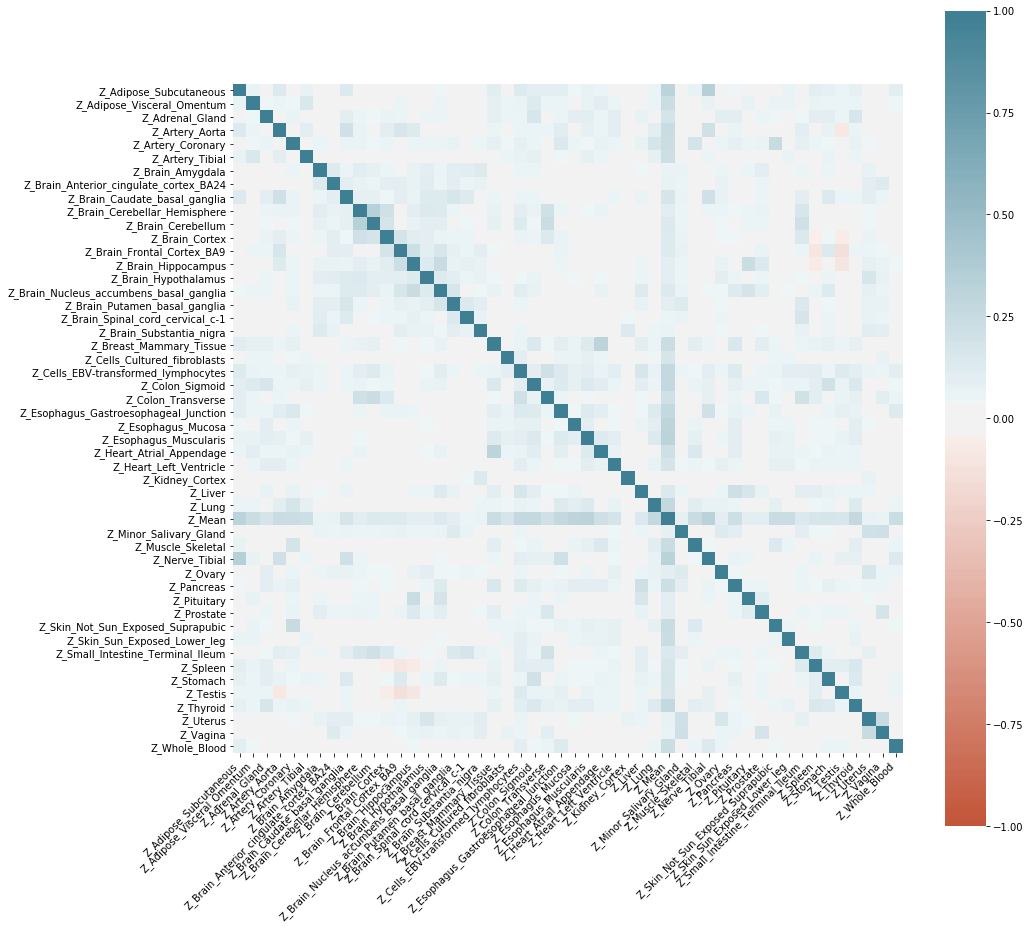

In [137]:
eqtl_heatmap(eqtl_data)

In [108]:
pip_data.corr()

,pip_Adipose_Subcutaneous,pip_Adipose_Visceral_Omentum,pip_Adrenal_Gland,pip_Artery_Aorta,pip_Artery_Coronary,pip_Artery_Tibial,pip_Brain_Amygdala,pip_Brain_Anterior_cingulate_cortex_BA24,pip_Brain_Caudate_basal_ganglia,pip_Brain_Cerebellar_Hemisphere,...,pip_Skin_Sun_Exposed_Lower_leg,pip_Small_Intestine_Terminal_Ileum,pip_Spleen,pip_Stomach,pip_Testis,pip_Thyroid,pip_Uterus,pip_Vagina,pip_Whole_Blood,Mean_after
pip_Adipose_Subcutaneous,1.000000,0.999430,0.999450,0.999455,0.999442,0.999436,0.999519,0.999513,0.999465,0.999463,...,0.999396,0.999444,0.999423,0.999432,0.999423,0.999414,0.999529,0.999522,0.999417,0.999707
pip_Adipose_Visceral_Omentum,0.999430,1.000000,0.999470,0.999478,0.999484,0.999438,0.999535,0.999527,0.999482,0.999484,...,0.999417,0.999460,0.999433,0.999447,0.999438,0.999446,0.999546,0.999530,0.999430,0.999723
pip_Adrenal_Gland,0.999450,0.999470,1.000000,0.999499,0.999514,0.999489,0.999570,0.999562,0.999520,0.999515,...,0.999433,0.999506,0.999476,0.999480,0.999476,0.999481,0.999589,0.999575,0.999464,0.999757
pip_Artery_Aorta,0.999455,0.999478,0.999499,1.000000,0.999494,0.999478,0.999570,0.999569,0.999513,0.999513,...,0.999435,0.999497,0.999466,0.999468,0.999475,0.999474,0.999584,0.999573,0.999475,0.999756
pip_Artery_Coronary,0.999442,0.999484,0.999514,0.999494,1.000000,0.999475,0.999570,0.999565,0.999522,0.999514,...,0.999433,0.999493,0.999471,0.999489,0.999473,0.999470,0.999590,0.999565,0.999473,0.999756
pip_Artery_Tibial,0.999436,0.999438,0.999489,0.999478,0.999475,1.000000,0.999548,0.999542,0.999496,0.999492,...,0.999426,0.999472,0.999456,0.999449,0.999447,0.999479,0.999562,0.999547,0.999448,0.999737
pip_Brain_Amygdala,0.999519,0.999535,0.999570,0.999570,0.999570,0.999548,1.000000,0.999653,0.999586,0.999585,...,0.999502,0.999570,0.999541,0.999543,0.999542,0.999546,0.999662,0.999647,0.999533,0.999824
pip_Brain_Anterior_cingulate_cortex_BA24,0.999513,0.999527,0.999562,0.999569,0.999565,0.999542,0.999653,1.000000,0.999596,0.999582,...,0.999491,0.999558,0.999534,0.999537,0.999539,0.999538,0.999658,0.999644,0.999527,0.999817
pip_Brain_Caudate_basal_ganglia,0.999465,0.999482,0.999520,0.999513,0.999522,0.999496,0.999586,0.999596,1.000000,0.999543,...,0.999454,0.999516,0.999495,0.999497,0.999486,0.999491,0.999604,0.999583,0.999487,0.999772
pip_Brain_Cerebellar_Hemisphere,0.999463,0.999484,0.999515,0.999513,0.999514,0.999492,0.999585,0.999582,0.999543,1.000000,...,0.999447,0.999524,0.999489,0.999491,0.999496,0.999492,0.999599,0.999587,0.999478,0.999771


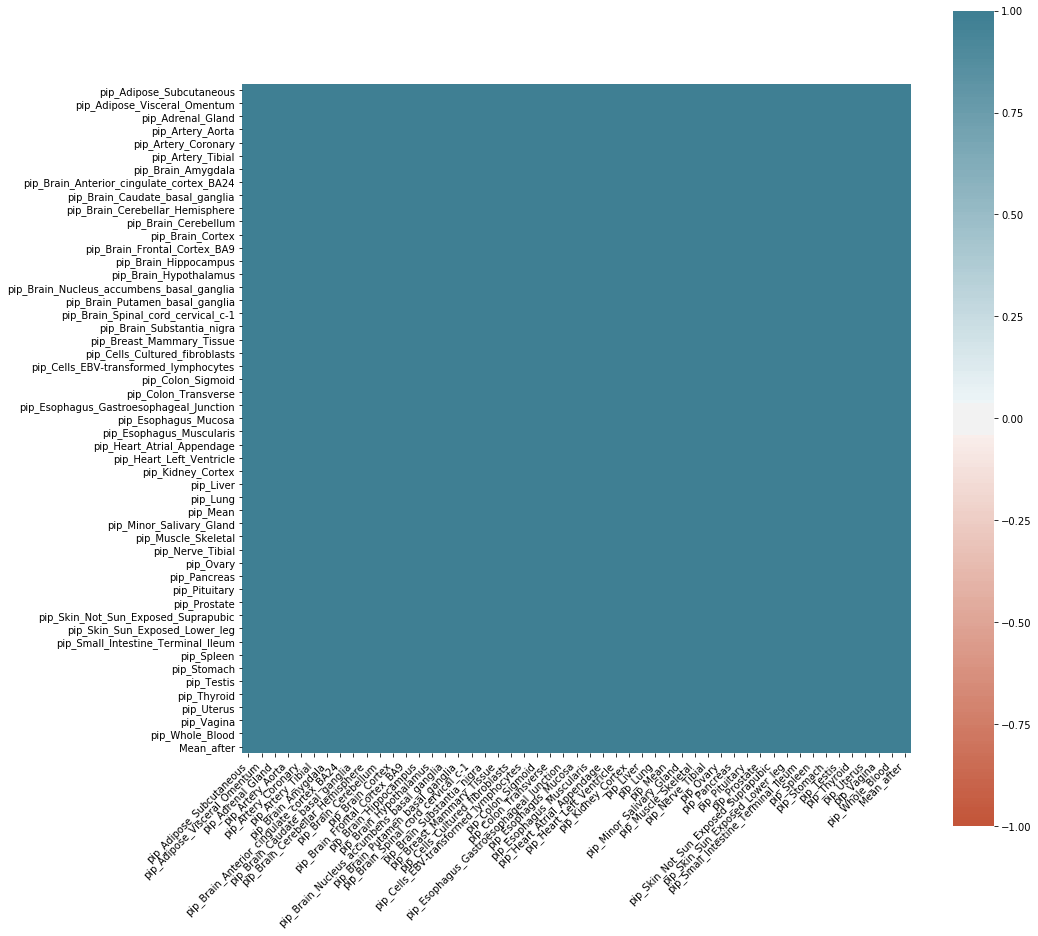

In [138]:
eqtl_heatmap(pip_data)

# Mean after finemapping

In [53]:
pip_data['Mean_after']=pip_data[pip_data.columns.drop(['gene_id','rs_id_dbSNP151_GRCh38p7','pip_Mean'])].mean(axis=1)

In [56]:
pip_data[['pip_Mean','Mean_after']]

,pip_Mean,Mean_after
0,0.002825,0.002051
1,0.002828,0.002051
2,0.002284,0.002045
3,0.002827,0.002049
4,0.002828,0.002050
...,...,...
64542,0.002439,0.001462
64543,0.001730,0.004115
64544,0.001793,0.001345
64545,0.001620,0.010472


In [65]:
pip_names=pip_data.columns[pip_data.columns.str.startswith('pip_')]

In [110]:
pip_data[(pip_data[pip_names] > 1).all(axis=1)]

,rs_id_dbSNP151_GRCh38p7,pip_Adipose_Subcutaneous,gene_id,pip_Adipose_Visceral_Omentum,pip_Adrenal_Gland,pip_Artery_Aorta,pip_Artery_Coronary,pip_Artery_Tibial,pip_Brain_Amygdala,pip_Brain_Anterior_cingulate_cortex_BA24,...,pip_Skin_Sun_Exposed_Lower_leg,pip_Small_Intestine_Terminal_Ileum,pip_Spleen,pip_Stomach,pip_Testis,pip_Thyroid,pip_Uterus,pip_Vagina,pip_Whole_Blood,Mean_after
523,rs16853872,31.5658,ENSG00000014824,31.5691,31.5596,31.5749,31.5768,31.5675,31.5596,31.5596,...,31.5681,31.5807,31.5735,31.5596,31.5731,31.5671,31.5596,31.5596,31.5678,31.568855
766,rs2234197,31.5658,ENSG00000025772,31.5691,31.5596,31.5749,31.5771,31.5675,31.5596,31.5596,...,31.5681,31.5814,31.5735,31.5703,31.5596,31.5671,31.5596,31.5596,31.5678,31.566410
1918,rs329126,31.5596,ENSG00000043143,31.5912,31.5596,31.5596,31.5596,31.5596,31.5596,31.5596,...,31.5596,31.5596,31.5596,31.5596,31.5596,31.5596,31.5596,31.5596,31.5596,31.560569
2268,rs76025377,31.5606,ENSG00000050748,31.5891,31.5596,31.5749,31.5596,31.5675,31.5596,31.5596,...,31.5681,31.5596,31.5596,31.5668,31.5596,31.5669,31.5596,31.5596,31.5678,31.563929
2496,rs1046385,31.5596,ENSG00000057252,31.5596,31.5716,31.5596,31.5596,31.5675,31.5596,31.5596,...,31.5596,31.5596,31.5596,31.5596,31.5596,31.5596,31.5596,31.5596,31.5596,31.560657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48720,rs77169596,31.5596,ENSG00000225217,31.5596,31.5596,31.5912,31.5596,31.5596,31.5596,31.5596,...,31.5596,31.5596,31.5651,31.5596,31.5596,31.5596,31.5596,31.5596,31.5596,31.561037
48788,rs12070295,31.5596,ENSG00000227372,31.5596,31.5596,31.5596,31.5596,31.5596,31.5596,31.5596,...,31.5596,31.5596,31.5596,31.5596,31.5596,31.5596,31.5596,31.5596,31.5596,31.560255
57472,rs62381376,31.5658,ENSG00000237190,31.5691,31.5605,31.5749,31.5769,31.5675,31.5596,31.5781,...,31.5681,31.5596,31.5603,31.5596,31.5851,31.5671,31.5602,31.5596,31.5678,31.569010
61905,rs2784066,31.5596,ENSG00000244187,31.5596,31.5596,31.5596,31.5596,31.5596,31.5596,31.5596,...,31.5596,31.5596,31.5805,31.5596,31.5596,31.5596,31.5596,31.5596,31.5677,31.560847


In [94]:
filtered_pip=pip_data[(pip_data[pip_names] < 1).any(axis=1)]

In [113]:
filtered_z=eqtl_data[(pip_data[pip_names] < 1).any(axis=1)]

In [114]:
filtered_z.corr()

,Z_Adipose_Subcutaneous,Z_Adipose_Visceral_Omentum,Z_Adrenal_Gland,Z_Artery_Aorta,Z_Artery_Coronary,Z_Artery_Tibial,Z_Brain_Amygdala,Z_Brain_Anterior_cingulate_cortex_BA24,Z_Brain_Caudate_basal_ganglia,Z_Brain_Cerebellar_Hemisphere,...,Z_Skin_Not_Sun_Exposed_Suprapubic,Z_Skin_Sun_Exposed_Lower_leg,Z_Small_Intestine_Terminal_Ileum,Z_Spleen,Z_Stomach,Z_Testis,Z_Thyroid,Z_Uterus,Z_Vagina,Z_Whole_Blood
Z_Adipose_Subcutaneous,1.000000,0.069636,0.005357,0.139843,0.009453,0.074271,-0.001024,-0.001694,0.133029,0.005444,...,0.016946,0.067668,0.003599,0.092986,0.080323,0.056065,0.079162,-0.001622,-0.002718,0.108413
Z_Adipose_Visceral_Omentum,0.069636,1.000000,0.042399,0.052552,0.040385,0.153523,0.007849,0.000539,0.037289,0.030970,...,0.062756,0.067100,0.019018,0.066018,0.055401,0.048332,0.054069,0.000912,0.000139,0.044847
Z_Adrenal_Gland,0.005357,0.042399,1.000000,0.020610,0.066953,0.004392,0.029632,0.029124,0.094932,0.053935,...,0.041201,0.028872,0.041270,0.094204,0.091289,0.061711,0.162548,0.020691,0.007680,0.006234
Z_Artery_Aorta,0.139843,0.052552,0.020610,1.000000,0.038291,0.090821,0.029941,-0.001267,0.206734,0.066471,...,0.027227,0.038796,0.108032,0.022763,0.073063,-0.080829,0.062051,0.020171,0.013673,0.029106
Z_Artery_Coronary,0.009453,0.040385,0.066953,0.038291,1.000000,0.015091,0.054603,0.016013,0.066337,0.064836,...,0.254906,0.007689,0.079995,0.051149,0.040696,0.033759,0.074557,0.037969,0.034437,0.017146
Z_Artery_Tibial,0.074271,0.153523,0.004392,0.090821,0.015091,1.000000,0.005028,0.004931,0.008971,0.009166,...,0.001565,0.062582,0.001271,0.030250,0.065228,0.035571,0.053546,-0.000757,-0.005277,0.025283
Z_Brain_Amygdala,-0.001024,0.007849,0.029632,0.029941,0.054603,0.005028,1.000000,0.124621,0.052016,0.114388,...,0.005628,0.003725,0.061650,0.030377,0.060569,-0.008110,0.000216,0.075091,0.034802,0.002763
Z_Brain_Anterior_cingulate_cortex_BA24,-0.001694,0.000539,0.029124,-0.001267,0.016013,0.004931,0.124621,1.000000,0.103538,0.070946,...,-0.006163,0.001126,0.025393,0.018493,0.002876,0.004540,-0.007237,0.096384,0.120061,0.010742
Z_Brain_Caudate_basal_ganglia,0.133029,0.037289,0.094932,0.206734,0.066337,0.008971,0.052016,0.103538,1.000000,0.083205,...,0.026620,0.008087,0.095702,0.035472,0.133646,0.048426,0.056178,0.100587,0.061195,0.029820
Z_Brain_Cerebellar_Hemisphere,0.005444,0.030970,0.053935,0.066471,0.064836,0.009166,0.114388,0.070946,0.083205,1.000000,...,0.017088,0.010614,0.161184,0.026844,0.004544,0.015112,0.006795,0.042908,0.013554,0.007479


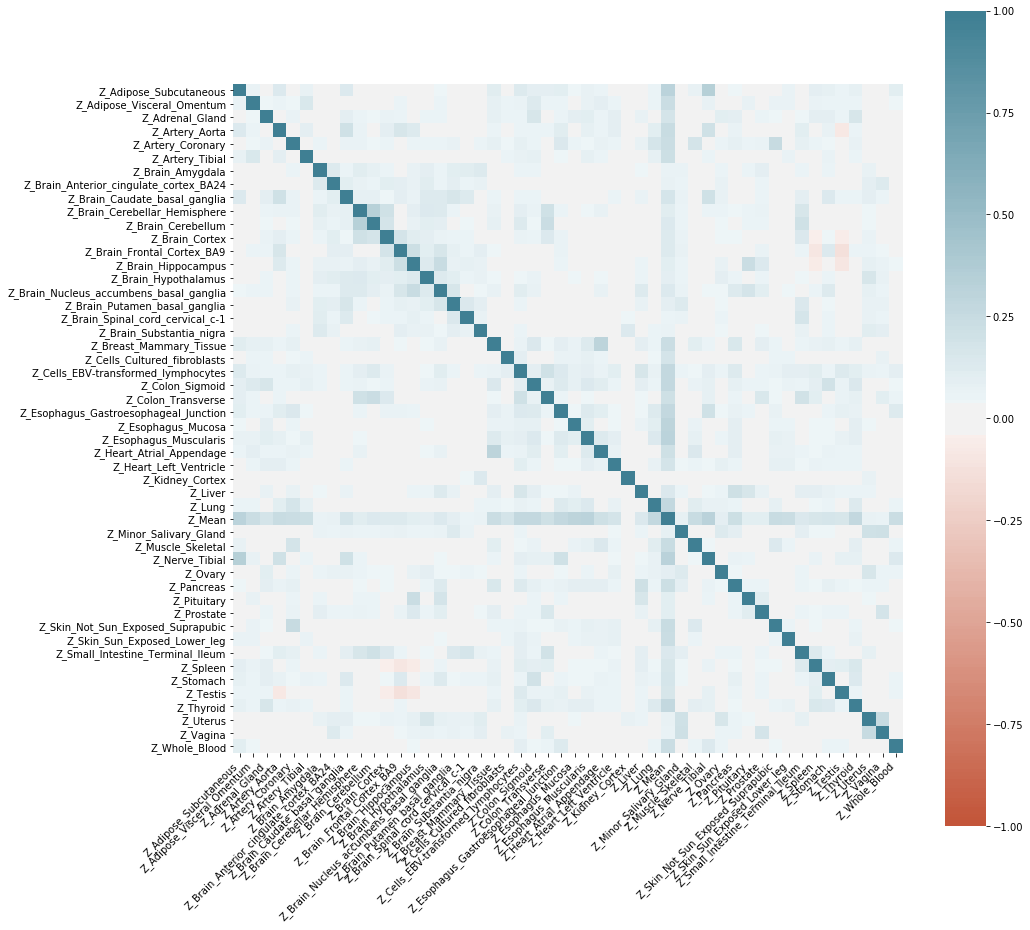

In [139]:
eqtl_heatmap(filtered_z)

In [112]:
filtered_pip.corr()

,pip_Adipose_Subcutaneous,pip_Adipose_Visceral_Omentum,pip_Adrenal_Gland,pip_Artery_Aorta,pip_Artery_Coronary,pip_Artery_Tibial,pip_Brain_Amygdala,pip_Brain_Anterior_cingulate_cortex_BA24,pip_Brain_Caudate_basal_ganglia,pip_Brain_Cerebellar_Hemisphere,...,pip_Skin_Sun_Exposed_Lower_leg,pip_Small_Intestine_Terminal_Ileum,pip_Spleen,pip_Stomach,pip_Testis,pip_Thyroid,pip_Uterus,pip_Vagina,pip_Whole_Blood,Mean_after
pip_Adipose_Subcutaneous,1.000000,0.193656,0.177268,0.188385,0.167511,0.182168,0.191103,0.193896,0.178441,0.176197,...,0.181338,0.173020,0.173864,0.185183,0.173496,0.156572,0.189296,0.199674,0.174494,0.441034
pip_Adipose_Visceral_Omentum,0.193656,1.000000,0.182590,0.199095,0.207750,0.162085,0.191491,0.190569,0.180032,0.185462,...,0.190033,0.173652,0.165094,0.183859,0.172302,0.179530,0.189920,0.185330,0.169978,0.443403
pip_Adrenal_Gland,0.177268,0.182590,1.000000,0.181642,0.204731,0.190107,0.194237,0.193635,0.189223,0.182908,...,0.166256,0.195105,0.181928,0.184797,0.180036,0.183798,0.209393,0.207845,0.173244,0.451170
pip_Artery_Aorta,0.188385,0.199095,0.181642,1.000000,0.176387,0.176274,0.199827,0.211196,0.181020,0.183676,...,0.174024,0.184285,0.169143,0.170664,0.182134,0.177024,0.204178,0.209057,0.192873,0.455310
pip_Artery_Coronary,0.167511,0.207750,0.204731,0.176387,1.000000,0.169876,0.197242,0.202033,0.194417,0.183774,...,0.168554,0.176424,0.176263,0.202302,0.178232,0.169510,0.215077,0.190873,0.189327,0.451802
pip_Artery_Tibial,0.182168,0.162085,0.190107,0.176274,0.169876,1.000000,0.187348,0.190612,0.178418,0.174455,...,0.182389,0.168412,0.178586,0.164916,0.163383,0.207131,0.192693,0.189349,0.175693,0.440765
pip_Brain_Amygdala,0.191103,0.191491,0.194237,0.199827,0.197242,0.187348,1.000000,0.253883,0.197384,0.196782,...,0.180111,0.202243,0.189636,0.189160,0.189777,0.191841,0.233475,0.229986,0.185915,0.479429
pip_Brain_Anterior_cingulate_cortex_BA24,0.193896,0.190569,0.193635,0.211196,0.202033,0.190612,0.253883,1.000000,0.230887,0.206808,...,0.174516,0.193051,0.190635,0.191572,0.197790,0.190443,0.243124,0.239935,0.188689,0.480176
pip_Brain_Caudate_basal_ganglia,0.178441,0.180032,0.189223,0.181020,0.194417,0.178418,0.197384,0.230887,1.000000,0.205662,...,0.176860,0.187781,0.188747,0.189413,0.174170,0.176919,0.210825,0.195532,0.186001,0.451876
pip_Brain_Cerebellar_Hemisphere,0.176197,0.185462,0.182908,0.183676,0.183774,0.174455,0.196782,0.206808,0.205662,1.000000,...,0.167580,0.203963,0.181302,0.181954,0.191522,0.180112,0.203120,0.205832,0.173780,0.455661


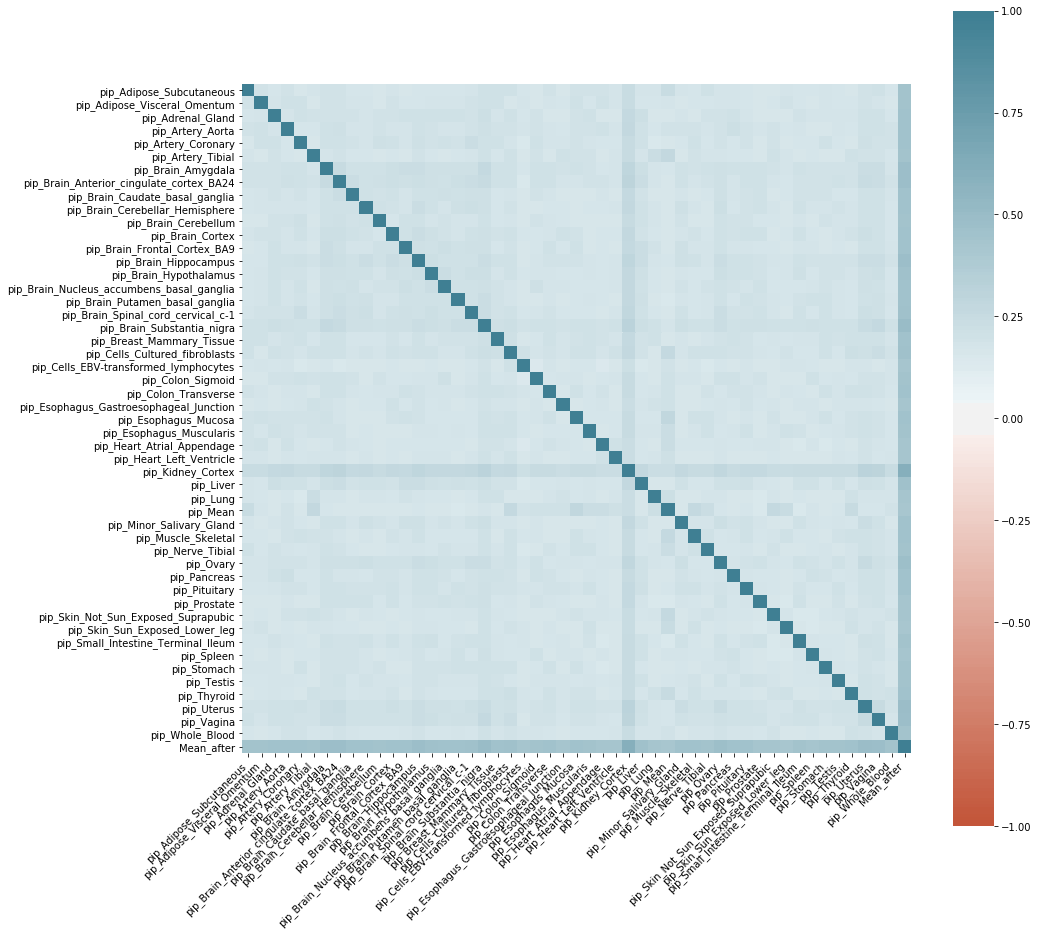

In [140]:
eqtl_heatmap(filtered_pip)

In [156]:
len(filtered_pip[(filtered_pip[pip_names] > 0.5).any(axis=1)])

3574

In [158]:
filtered_pip[(filtered_pip[pip_names] > 0.5).any(axis=1)].corr()[['pip_Mean','Mean_after']].corr()

,pip_Mean,Mean_after
pip_Mean,1.000000,0.245081
Mean_after,0.245081,1.000000


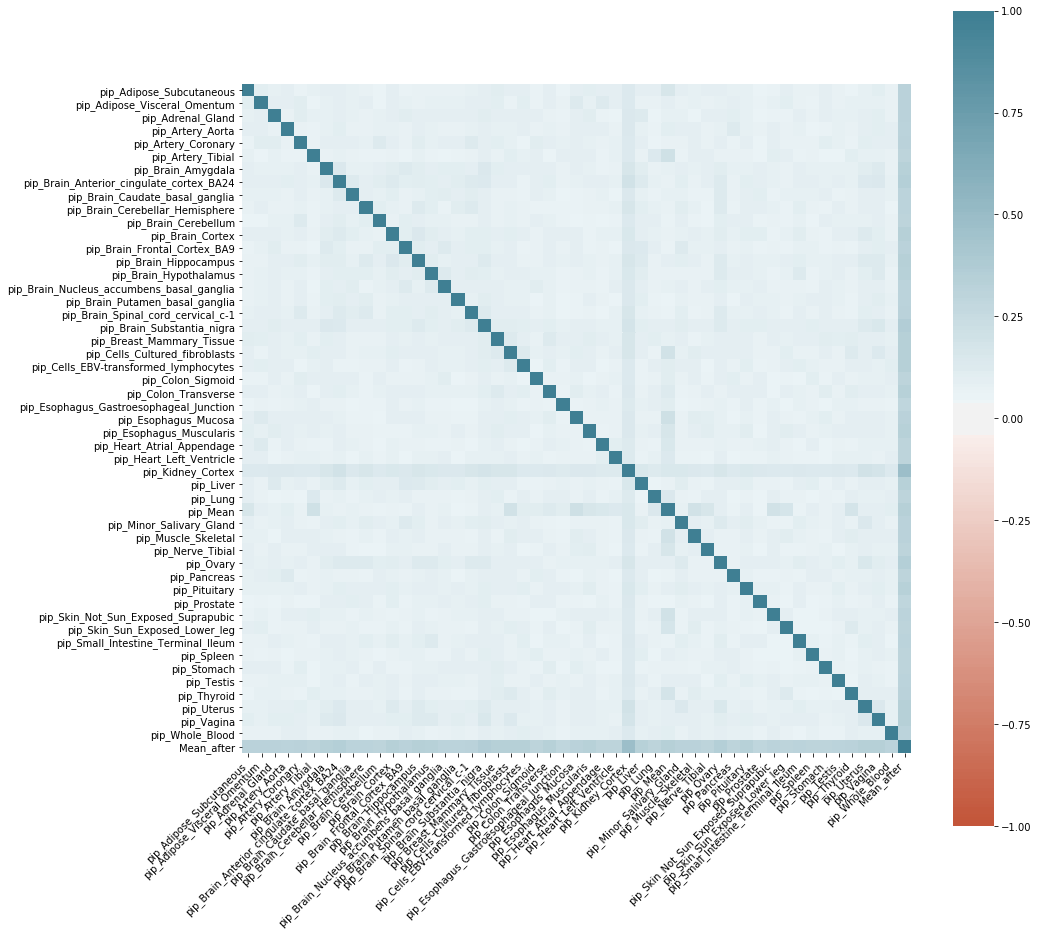

In [159]:
eqtl_heatmap(filtered_pip[(filtered_pip[pip_names] > 0.5).any(axis=1)])

In [41]:
pd.concat([pip_data[['rs_id_dbSNP151_GRCh38p7','gene_id','pip_Mean']],eqtl_data['Z_Mean']],axis=1)

,rs_id_dbSNP151_GRCh38p7,gene_id,pip_Mean,Z_Mean
0,rs66851636,ENSG00000004534,0.002825,-0.178991
1,rs62262093,ENSG00000004534,0.002828,0.036652
2,rs62262114,ENSG00000004534,0.002284,0.280015
3,rs6446187,ENSG00000004534,0.002827,0.279447
4,rs6446189,ENSG00000004534,0.002828,0.279447
...,...,...,...,...
64542,rs1023955,ENSG00000283375,0.002439,-0.128100
64543,rs11820132,ENSG00000283375,0.001730,-0.085116
64544,rs1552204,ENSG00000283375,0.001793,-0.045061
64545,rs2679051,ENSG00000283375,0.001620,-0.045061


In [154]:
filtered_pip

,rs_id_dbSNP151_GRCh38p7,pip_Adipose_Subcutaneous,gene_id,pip_Adipose_Visceral_Omentum,pip_Adrenal_Gland,pip_Artery_Aorta,pip_Artery_Coronary,pip_Artery_Tibial,pip_Brain_Amygdala,pip_Brain_Anterior_cingulate_cortex_BA24,...,pip_Skin_Sun_Exposed_Lower_leg,pip_Small_Intestine_Terminal_Ileum,pip_Spleen,pip_Stomach,pip_Testis,pip_Thyroid,pip_Uterus,pip_Vagina,pip_Whole_Blood,Mean_after
0,rs66851636,0.002221,ENSG00000004534,0.002317,0.002543,0.002507,0.002588,0.002270,0.000178,0.002648,...,0.002288,0.002771,0.002458,0.002356,0.002448,0.002258,0.002894,0.000178,0.002279,0.002051
1,rs62262093,0.002221,ENSG00000004534,0.002317,0.002543,0.002507,0.002588,0.002270,0.000178,0.002648,...,0.002288,0.002771,0.002458,0.002356,0.002448,0.002258,0.002893,0.000178,0.002279,0.002051
2,rs62262114,0.002221,ENSG00000004534,0.002317,0.002543,0.002507,0.002588,0.002270,0.000178,0.002647,...,0.002288,0.002771,0.002458,0.002356,0.002448,0.002258,0.002797,0.000178,0.002279,0.002045
3,rs6446187,0.002221,ENSG00000004534,0.002317,0.002543,0.002507,0.002588,0.002270,0.000178,0.002648,...,0.002288,0.002771,0.002458,0.002356,0.002448,0.002258,0.002817,0.000178,0.002279,0.002049
4,rs6446189,0.002221,ENSG00000004534,0.002317,0.002543,0.002507,0.002588,0.002270,0.000178,0.002648,...,0.002288,0.002771,0.002458,0.002356,0.002448,0.002258,0.002863,0.000178,0.002279,0.002050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64542,rs1023955,0.002246,ENSG00000283375,0.002343,0.000180,0.002535,0.002620,0.002296,0.000265,0.000180,...,0.002313,0.000180,0.000180,0.002395,0.002476,0.002284,0.000180,0.000180,0.002313,0.001462
64543,rs11820132,0.002246,ENSG00000283375,0.002343,0.000180,0.002535,0.002551,0.002296,0.000177,0.000180,...,0.002313,0.000180,0.000180,0.001699,0.002475,0.002284,0.000180,0.000180,0.001792,0.004115
64544,rs1552204,0.002246,ENSG00000283375,0.002343,0.000180,0.002535,0.002551,0.002296,0.000177,0.000180,...,0.002313,0.000180,0.000180,0.001579,0.002475,0.002284,0.000180,0.000180,0.001759,0.001345
64545,rs2679051,0.002246,ENSG00000283375,0.002343,0.000180,0.002535,0.002486,0.002296,0.000177,0.000180,...,0.002313,0.000180,0.000180,0.001786,0.002475,0.002284,0.000180,0.000180,0.001927,0.010472


# Comparison with GTEX correlations

In [4]:
raw_dapg=pd.read_csv('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/original-data/GTEX/pre-finemapped/GTEx_v8_finemapping_DAPG/GTEx_v8_finemapping_DAPG.txt.gz',sep='\t')

In [5]:
raw_dapg

,tissue_id,gene_id,cluster_id,cluster_pip,variant_id,variant_pip
0,Adipose_Subcutaneous,ENSG00000000457.13,1,1.000,chr1_169891332_G_A_b38,0.988100
1,Adipose_Subcutaneous,ENSG00000000457.13,1,1.000,chr1_169913898_G_A_b38,0.011700
2,Adipose_Subcutaneous,ENSG00000000457.13,2,0.994,chr1_169894024_A_C_b38,0.120800
3,Adipose_Subcutaneous,ENSG00000000457.13,2,0.994,chr1_169894240_G_T_b38,0.088270
4,Adipose_Subcutaneous,ENSG00000000457.13,2,0.994,chr1_169892930_T_C_b38,0.024170
...,...,...,...,...,...,...
21648579,Whole_Blood,ENSG00000284526.1,3,0.579,chr17_76562364_A_G_b38,0.051920
21648580,Whole_Blood,ENSG00000284526.1,3,0.579,chr17_76562724_A_G_b38,0.027550
21648581,Whole_Blood,ENSG00000284526.1,3,0.579,chr17_76545047_A_G_b38,0.012900
21648582,Whole_Blood,ENSG00000284526.1,3,0.579,chr17_76563205_T_C_b38,0.012720


In [6]:
dapg=raw_dapg.pivot_table(values=['cluster_pip','variant_pip'], index=['gene_id','variant_id'], columns='tissue_id')

In [7]:
dapg['variant_pip'].corr()

tissue_id,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,Brain_Caudate_basal_ganglia,Brain_Cerebellar_Hemisphere,...,Skin_Not_Sun_Exposed_Suprapubic,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole_Blood
tissue_id,,,,,,,,,,,,,,,,,,,,,
Adipose_Subcutaneous,1.000000,0.739801,0.693721,0.715255,0.697346,0.734895,0.632360,0.643713,0.671580,0.653647,...,0.697394,0.693308,0.680742,0.695633,0.712285,0.665329,0.671078,0.679245,0.658578,0.637043
Adipose_Visceral_Omentum,0.739801,1.000000,0.708170,0.726030,0.713879,0.724900,0.658605,0.670268,0.680370,0.665026,...,0.694305,0.683857,0.690027,0.703997,0.719222,0.667182,0.670503,0.692607,0.677835,0.647453
Adrenal_Gland,0.693721,0.708170,1.000000,0.697739,0.698862,0.686478,0.666554,0.677489,0.686907,0.656608,...,0.661187,0.646444,0.688118,0.687548,0.717516,0.657210,0.634539,0.696399,0.690577,0.608953
Artery_Aorta,0.715255,0.726030,0.697739,1.000000,0.710474,0.731730,0.654440,0.671121,0.680381,0.662117,...,0.677240,0.665481,0.678892,0.694639,0.709804,0.650910,0.654241,0.687433,0.671140,0.627982
Artery_Coronary,0.697346,0.713879,0.698862,0.710474,1.000000,0.704736,0.690387,0.682117,0.685745,0.681855,...,0.663648,0.662655,0.707637,0.703664,0.714625,0.656974,0.638131,0.712925,0.699839,0.630291
Artery_Tibial,0.734895,0.724900,0.686478,0.731730,0.704736,1.000000,0.645635,0.653668,0.675941,0.656205,...,0.691996,0.686599,0.667857,0.685025,0.715484,0.664397,0.659072,0.682928,0.653732,0.627926
Brain_Amygdala,0.632360,0.658605,0.666554,0.654440,0.690387,0.645635,1.000000,0.734917,0.711771,0.682133,...,0.614596,0.590270,0.653407,0.648867,0.672585,0.639921,0.587719,0.688720,0.678992,0.573875
Brain_Anterior_cingulate_cortex_BA24,0.643713,0.670268,0.677489,0.671121,0.682117,0.653668,0.734917,1.000000,0.727917,0.690208,...,0.621063,0.603817,0.664210,0.661184,0.670460,0.631089,0.594929,0.689807,0.681042,0.579590
Brain_Caudate_basal_ganglia,0.671580,0.680370,0.686907,0.680381,0.685745,0.675941,0.711771,0.727917,1.000000,0.699269,...,0.644467,0.626551,0.680054,0.669215,0.681869,0.650810,0.615296,0.684176,0.674159,0.601437


In [8]:
dapg['cluster_pip'].corr()

tissue_id,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,Brain_Caudate_basal_ganglia,Brain_Cerebellar_Hemisphere,...,Skin_Not_Sun_Exposed_Suprapubic,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole_Blood
tissue_id,,,,,,,,,,,,,,,,,,,,,
Adipose_Subcutaneous,1.000000,0.330809,0.251648,0.268427,0.274407,0.291708,0.199631,0.211981,0.253179,0.222993,...,0.277671,0.276528,0.269767,0.237753,0.263071,0.205503,0.247445,0.215216,0.243951,0.203516
Adipose_Visceral_Omentum,0.330809,1.000000,0.294053,0.287466,0.320135,0.270586,0.206644,0.223421,0.240092,0.196122,...,0.288836,0.255854,0.277221,0.277798,0.336212,0.208649,0.277024,0.293362,0.245537,0.204185
Adrenal_Gland,0.251648,0.294053,1.000000,0.306814,0.357187,0.259670,0.303611,0.207997,0.309218,0.243750,...,0.217657,0.214206,0.347871,0.265408,0.304191,0.186530,0.250430,0.266393,0.302011,0.193959
Artery_Aorta,0.268427,0.287466,0.306814,1.000000,0.339730,0.364389,0.274737,0.259819,0.289325,0.254770,...,0.279535,0.244209,0.309610,0.281756,0.309839,0.202601,0.251471,0.225947,0.240577,0.177352
Artery_Coronary,0.274407,0.320135,0.357187,0.339730,1.000000,0.296075,0.305617,0.282994,0.321086,0.283878,...,0.272618,0.249767,0.331920,0.303450,0.342692,0.243696,0.233509,0.387170,0.353194,0.174474
Artery_Tibial,0.291708,0.270586,0.259670,0.364389,0.296075,1.000000,0.239012,0.215858,0.205230,0.206718,...,0.265222,0.244869,0.265448,0.214867,0.302137,0.226919,0.247590,0.188547,0.236938,0.163335
Brain_Amygdala,0.199631,0.206644,0.303611,0.274737,0.305617,0.239012,1.000000,0.357036,0.357769,0.336362,...,0.172736,0.201532,0.288643,0.228403,0.285185,0.169090,0.176839,0.298112,0.298979,0.206895
Brain_Anterior_cingulate_cortex_BA24,0.211981,0.223421,0.207997,0.259819,0.282994,0.215858,0.357036,1.000000,0.372029,0.310011,...,0.231663,0.213497,0.320545,0.233676,0.262606,0.187475,0.163872,0.295156,0.271016,0.189099
Brain_Caudate_basal_ganglia,0.253179,0.240092,0.309218,0.289325,0.321086,0.205230,0.357769,0.372029,1.000000,0.290670,...,0.191304,0.153243,0.288189,0.226541,0.293094,0.226439,0.260094,0.277777,0.304615,0.129803


In [9]:
raw_caviar=pd.read_csv('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/original-data/GTEX/pre-finemapped/GTEx_v8_finemapping_CAVIAR/CAVIAR_Results_v8_GTEx_LD_ALL_NOCUTOFF.txt.gz',sep='\t')

In [10]:
raw_caviar

,TISSUE,GENE,eQTL,CHROM,POS,Probability
0,Brain_Caudate_basal_ganglia,ENSG00000248485.1,1_161274374,1,161274374,0.157456
1,Brain_Caudate_basal_ganglia,ENSG00000248485.1,1_161687648,1,161687648,0.211998
2,Brain_Caudate_basal_ganglia,ENSG00000248485.1,1_161319639,1,161319639,0.119975
3,Brain_Caudate_basal_ganglia,ENSG00000248485.1,1_160894012,1,160894012,0.091333
4,Brain_Caudate_basal_ganglia,ENSG00000248485.1,1_160928560,1,160928560,0.091333
...,...,...,...,...,...,...
22859296,Brain_Amygdala,ENSG00000100239.15,22_50416982,22,50416982,0.014540
22859297,Brain_Amygdala,ENSG00000100239.15,22_50416984,22,50416984,0.014540
22859298,Brain_Amygdala,ENSG00000100239.15,22_50417925,22,50417925,0.012778
22859299,Brain_Amygdala,ENSG00000100239.15,22_50432191,22,50432191,0.012778


In [11]:
caviar=raw_caviar.pivot_table(values=['Probability'], index=['GENE','eQTL'], columns='TISSUE')

In [12]:
caviar.corr()

Probability  \
TISSUE                                            Adipose_Subcutaneous   
            TISSUE                                                       
Probability Adipose_Subcutaneous                              1.000000   
            Adipose_Visceral_Omentum                          0.684859   
            Adrenal_Gland                                     0.552386   
            Artery_Aorta                                      0.629141   
            Artery_Coronary                                   0.576235   
            Artery_Tibial                                     0.659217   
            Brain_Amygdala                                    0.467723   
            Brain_Anterior_cingulate_cortex_BA24              0.462815   
            Brain_Caudate_basal_ganglia                       0.499882   
            Brain_Cerebellar_Hemisphere                       0.473320   
            Brain_Cerebellum                                  0.489880   
            Brain_Cortex                                      0.502227   
            Brain_Frontal_Cortex_BA9                          0.480959   
            Brain_Hippocampus                                 0.479197   
            Brain_Hypothalamus                                0.495963   
            Brain_Nucleus_accumbens_basal_ganglia             0.498522   
            Brain_Putamen_basal_ganglia                       0.482072   
            Brain_Spinal_cord_cervical_c-1                    0.469773   
            Brain_Substantia_nigra                            0.449499   
            Breast_Mammary_Tissue                             0.673504   
            Cells_Cultured_fibroblasts                        0.588732   
            Cells_EBV-transformed_lymphocytes                 0.470282   
            Colon_Sigmoid                                     0.609466   
            Colon_Transverse                                  0.618584   
            Esophagus_Gastroesophageal_Junction               0.625039   
            Esophagus_Mucosa                                  0.606503   
            Esophagus_Muscularis                              0.654677   
            Heart_Atrial_Appendage                            0.605569   
            Heart_Left_Ventricle                              0.592763   
            Kidney_Cortex                                     0.425417   
            Liver                                             0.495439   
            Lung                                              0.651536   
            Minor_Salivary_Gland                              0.515346   
            Muscle_Skeletal                                   0.607765   
            Nerve_Tibial                                      0.665028   
            Ovary                                             0.518936   
            Pancreas                                          0.566579   
            Pituitary                                         0.529777   
            Prostate                                          0.567620   
            Skin_Not_Sun_Exposed_Suprapubic                   0.636837   
            Skin_Sun_Exposed_Lower_leg                        0.648118   
            Small_Intestine_Terminal_Ileum                    0.541401   
            Spleen                                            0.555492   
            Stomach                                           0.608996   
            Testis                                            0.493988   
            Thyroid                                           0.635151   
            Uterus                                            0.510219   
            Vagina                                            0.496771   
            Whole_Blood                                       0.545692   

                                                                            \
TISSUE                                            Adipose_Visceral_Omentum   
            TISSUE                                    

# Old

In [6]:
dapg=dapg.rename(columns={'pval_nominal':'Z-score','pip':'DAPG-pip'})

In [7]:
dapg

,rs_id_dbSNP151_GRCh38p7,Z-score,DAPG-pip,gene_id
0,rs6489746,-1.393346,0.002433,ENSG00000002016
1,rs181881729,1.312272,0.002433,ENSG00000002016
2,rs7962606,0.531596,0.002433,ENSG00000002016
3,rs10774457,0.752033,0.002433,ENSG00000002016
4,rs10774458,-1.718459,0.591004,ENSG00000002016
...,...,...,...,...
172,rs11037653,2.253296,0.000180,ENSG00000283375
173,rs10838176,1.678354,0.000180,ENSG00000283375
174,rs1464231,2.253296,0.000180,ENSG00000283375
175,rs10768986,2.253296,0.000180,ENSG00000283375


In [12]:
caviar=pd.DataFrame()
for i in os.listdir(dir+'caviar-output/'):
    if i.startswith('ENSG'):
        gene=i.split('_')[0]
        #eQTL=pd.read_csv(dir+'eQTL_z/'+gene+'.csv',sep='\t')
        #eQTL['rs_id_dbSNP151_GRCh38p7']=eQTL['rs_id_dbSNP151_GRCh38p7'].str.strip().astype(str)
        pip=pd.read_csv(dir+'caviar-output/'+i,sep='\t',skiprows=1,names=['rs_id_dbSNP151_GRCh38p7','caviar-pip','caviar-Causal_Post._Prob.'])
        #pip['rs_id_dbSNP151_GRCh38p7']=pip['rs_id_dbSNP151_GRCh38p7'].str.strip().astype(str)
        #predata=eQTL.merge(pip)
        pip['gene_id']=gene
        caviar=pd.concat([caviar,pip])

In [13]:
caviar

,rs_id_dbSNP151_GRCh38p7,caviar-pip,caviar-Causal_Post._Prob.,gene_id
0,rs6489746,0.153266,0.029382,ENSG00000002016
1,rs181881729,0.114921,0.022031,ENSG00000002016
2,rs7962606,0.029007,0.005561,ENSG00000002016
3,rs10774457,0.038225,0.007328,ENSG00000002016
4,rs10774458,0.091509,0.017543,ENSG00000002016
...,...,...,...,...
172,rs11037653,0.000019,0.000037,ENSG00000283375
173,rs10838176,0.000007,0.000014,ENSG00000283375
174,rs1464231,0.000019,0.000037,ENSG00000283375
175,rs10768986,0.000019,0.000037,ENSG00000283375


In [14]:
eqtl=pd.read_csv('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/processed_data/eQTL_before_finemapping.csv')

In [15]:
eqtl

,gene_id,Description,GM12878-Median-Expression,variant_id,tss_distance,ma_samples,ma_count,maf,pval_nominal,slope,slope_se,pval_nominal_threshold,min_pval_nominal,pval_beta,rs_id_dbSNP151_GRCh38p7,chr,pos
0,ENSG00000225972,MTND1P23,3.89864,chr1_1518892_T_A_b38,889830,16,17,0.057823,1.868400e-05,-0.987545,0.221643,0.000040,1.307400e-06,0.002072,rs10159059,1,1518892
1,ENSG00000225972,MTND1P23,3.89864,chr1_1567656_T_C_b38,938594,12,14,0.047619,3.167300e-05,-0.915333,0.211757,0.000040,1.307400e-06,0.002072,rs60445846,1,1567656
2,ENSG00000237973,MTCO1P12,34.76730,chr1_1567656_T_C_b38,936582,12,14,0.047619,4.280020e-06,-1.054120,0.218953,0.000038,2.554300e-07,0.000502,rs60445846,1,1567656
3,ENSG00000225972,MTND1P23,3.89864,chr1_1572951_A_G_b38,943889,12,13,0.044218,2.907060e-05,-1.008030,0.232032,0.000040,1.307400e-06,0.002072,rs116720752,1,1572951
4,ENSG00000237973,MTCO1P12,34.76730,chr1_1572951_A_G_b38,941877,12,13,0.044218,5.250250e-06,-1.145970,0.240466,0.000038,2.554300e-07,0.000502,rs116720752,1,1572951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335090,ENSG00000079974,RABL2B,9.16670,chr22_50787086_C_T_b38,3423,91,111,0.377551,1.594890e-05,0.405033,0.090108,0.000044,1.664040e-09,0.000006,rs4482606,22,50787086
335091,ENSG00000079974,RABL2B,9.16670,chr22_50790460_T_G_b38,6797,85,103,0.350340,1.366140e-05,0.416240,0.091819,0.000044,1.664040e-09,0.000006,rs201882178,22,50790460
335092,ENSG00000079974,RABL2B,9.16670,chr22_50791171_T_TCTC_b38,7508,87,105,0.357143,2.957010e-05,0.403706,0.093019,0.000044,1.664040e-09,0.000006,rs575602314,22,50791171
335093,ENSG00000079974,RABL2B,9.16670,chr22_50792792_A_G_b38,9129,29,31,0.105442,8.152710e-08,0.784826,0.137474,0.000044,1.664040e-09,0.000006,rs368226325,22,50792792


In [18]:
merged=eqtl.merge(dapg).merge(caviar)

In [19]:
merged

,gene_id,Description,GM12878-Median-Expression,variant_id,tss_distance,ma_samples,ma_count,maf,pval_nominal,slope,...,pval_nominal_threshold,min_pval_nominal,pval_beta,rs_id_dbSNP151_GRCh38p7,chr,pos,Z-score,DAPG-pip,caviar-pip,caviar-Causal_Post._Prob.
0,ENSG00000127054,INTS11,45.0173,chr1_1359943_G_A_b38,35252,46,58,0.197279,5.487880e-06,-0.412018,...,0.000024,5.581200e-08,1.839370e-04,rs34389364,1,1359943,0.617370,0.005270,0.085671,0.005547
1,ENSG00000127054,INTS11,45.0173,chr1_1360023_T_C_b38,35332,46,58,0.197279,5.487880e-06,-0.412018,...,0.000024,5.581200e-08,1.839370e-04,rs34876581,1,1360023,0.617370,0.005270,0.084828,0.005492
2,ENSG00000127054,INTS11,45.0173,chr1_1363153_T_G_b38,38462,44,56,0.190476,2.329910e-06,-0.415732,...,0.000024,5.581200e-08,1.839370e-04,rs4596826,1,1363153,0.998909,0.005270,0.139389,0.009025
3,ENSG00000127054,INTS11,45.0173,chr1_1368047_ACT_A_b38,43356,43,55,0.187075,8.969620e-07,-0.424147,...,0.000024,5.581200e-08,1.839370e-04,rs34703950,1,1368047,1.172034,0.293357,0.206977,0.013401
4,ENSG00000127054,INTS11,45.0173,chr1_1375595_C_T_b38,50904,43,52,0.176871,1.999400e-05,-0.385391,...,0.000024,5.581200e-08,1.839370e-04,rs2649594,1,1375595,-1.135228,0.101577,0.161045,0.010427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104961,ENSG00000096996,IL12RB1,16.5480,chr19_18093390_C_T_b38,-5554,83,99,0.336735,1.337180e-07,-0.321133,...,0.000020,4.295180e-14,2.036010e-10,rs399343,19,18093390,0.380825,0.000930,0.006123,0.007680
104962,ENSG00000096996,IL12RB1,16.5480,chr19_18095507_G_T_b38,-3437,49,55,0.187075,7.287160e-08,-0.404583,...,0.000020,4.295180e-14,2.036010e-10,rs55881864,19,18095507,0.393935,0.000930,0.003204,0.004019
104963,ENSG00000096996,IL12RB1,16.5480,chr19_18103711_T_C_b38,4767,59,67,0.227891,3.370270e-06,-0.354410,...,0.000020,4.295180e-14,2.036010e-10,rs11668601,19,18103711,-0.316552,0.000930,0.097762,0.122635
104964,ENSG00000096996,IL12RB1,16.5480,chr19_18112540_A_G_b38,13596,84,104,0.353741,1.826800e-05,-0.273328,...,0.000020,4.295180e-14,2.036010e-10,rs273510,19,18112540,-3.526549,0.585505,0.477680,0.599214


In [22]:
merged[['DAPG-pip','caviar-pip']].corr()

,DAPG-pip,caviar-pip
DAPG-pip,1.000000,0.739634
caviar-pip,0.739634,1.000000


In [20]:
merged.groupby(['gene_id']).sum()['DAPG-pip']

gene_id
ENSG00000002016    0.622627
ENSG00000004534    0.614277
ENSG00000005801    0.666664
ENSG00000008128    0.647390
ENSG00000010322    0.623353
                     ...   
ENSG00000280670    0.614030
ENSG00000280798    0.606456
ENSG00000281103    0.614167
ENSG00000281501    0.615680
ENSG00000283375    0.614289
Name: DAPG-pip, Length: 919, dtype: float64

In [21]:
merged['GM12878-Median-Expression'].mean(),merged['GM12878-Median-Expression'].median()

(135.78646515347828, 16.5919)

In [142]:
merged.to_csv(dir+'eQTLs_after_finemapping.csv',index=False)

In [23]:
GTEX_DAPG=pd.read_csv('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/original-data/GTEX/pre-finemapped/GTEx_v8_finemapping_DAPG/GTEx_v8_finemapping_DAPG_GM12878.txt',sep='\t')

In [24]:
GTEX_DAPG

,tissue_id,gene_id,cluster_id,cluster_pip,variant_id,variant_pip
0,Cells_EBV-transformed_lymphocytes,ENSG00000000457.13,1,0.589,chr1_169889587_T_A_b38,0.067710
1,Cells_EBV-transformed_lymphocytes,ENSG00000000457.13,1,0.589,chr1_169891012_G_T_b38,0.065850
2,Cells_EBV-transformed_lymphocytes,ENSG00000000457.13,1,0.589,chr1_169887971_T_C_b38,0.050050
3,Cells_EBV-transformed_lymphocytes,ENSG00000000457.13,1,0.589,chr1_169886292_CAG_C_b38,0.031660
4,Cells_EBV-transformed_lymphocytes,ENSG00000000457.13,1,0.589,chr1_169890576_C_G_b38,0.025130
...,...,...,...,...,...,...
284437,Cells_EBV-transformed_lymphocytes,ENSG00000284543.1,2,0.309,chr1_31506888_T_G_b38,0.000389
284438,Cells_EBV-transformed_lymphocytes,ENSG00000284543.1,2,0.309,chr1_31506084_C_G_b38,0.000389
284439,Cells_EBV-transformed_lymphocytes,ENSG00000284543.1,2,0.309,chr1_31505344_C_T_b38,0.000389
284440,Cells_EBV-transformed_lymphocytes,ENSG00000284543.1,2,0.309,chr1_31505391_T_C_b38,0.000389


In [25]:
GTEX_DAPG['gene_id']=GTEX_DAPG['gene_id'].str.split('.',expand=True)[0]

In [26]:
GTEX_DAPG

,tissue_id,gene_id,cluster_id,cluster_pip,variant_id,variant_pip
0,Cells_EBV-transformed_lymphocytes,ENSG00000000457,1,0.589,chr1_169889587_T_A_b38,0.067710
1,Cells_EBV-transformed_lymphocytes,ENSG00000000457,1,0.589,chr1_169891012_G_T_b38,0.065850
2,Cells_EBV-transformed_lymphocytes,ENSG00000000457,1,0.589,chr1_169887971_T_C_b38,0.050050
3,Cells_EBV-transformed_lymphocytes,ENSG00000000457,1,0.589,chr1_169886292_CAG_C_b38,0.031660
4,Cells_EBV-transformed_lymphocytes,ENSG00000000457,1,0.589,chr1_169890576_C_G_b38,0.025130
...,...,...,...,...,...,...
284437,Cells_EBV-transformed_lymphocytes,ENSG00000284543,2,0.309,chr1_31506888_T_G_b38,0.000389
284438,Cells_EBV-transformed_lymphocytes,ENSG00000284543,2,0.309,chr1_31506084_C_G_b38,0.000389
284439,Cells_EBV-transformed_lymphocytes,ENSG00000284543,2,0.309,chr1_31505344_C_T_b38,0.000389
284440,Cells_EBV-transformed_lymphocytes,ENSG00000284543,2,0.309,chr1_31505391_T_C_b38,0.000389


In [27]:
DAPG_comp=merged.merge(GTEX_DAPG.drop(columns=['tissue_id','cluster_id']))

In [28]:
DAPG_comp

,gene_id,Description,GM12878-Median-Expression,variant_id,tss_distance,ma_samples,ma_count,maf,pval_nominal,slope,...,pval_beta,rs_id_dbSNP151_GRCh38p7,chr,pos,Z-score,DAPG-pip,caviar-pip,caviar-Causal_Post._Prob.,cluster_pip,variant_pip
0,ENSG00000127054,INTS11,45.01730,chr1_1368047_ACT_A_b38,43356,43,55,0.187075,8.969620e-07,-0.424147,...,1.839370e-04,rs34703950,1,1368047,1.172034,0.293357,0.206977,0.013401,0.989,0.003245
1,ENSG00000242485,MRPL20,98.80240,chr1_1407232_G_C_b38,-81,48,57,0.193878,7.079920e-10,0.277412,...,3.197320e-06,rs2275915,1,1407232,-1.000000,0.333332,0.500000,0.006201,0.999,0.999400
2,ENSG00000160072,ATAD3B,30.27700,chr1_1520875_A_G_b38,49106,36,48,0.163265,4.495860e-06,-0.391218,...,9.185570e-08,rs1077906,1,1520875,-0.550920,0.000298,0.000020,0.000040,0.625,0.242800
3,ENSG00000160072,ATAD3B,30.27700,chr1_1521518_G_A_b38,49749,36,48,0.163265,4.495860e-06,-0.391218,...,9.185570e-08,rs9439441,1,1521518,-0.550920,0.000298,0.000020,0.000040,0.625,0.242800
4,ENSG00000160072,ATAD3B,30.27700,chr1_1530002_A_G_b38,58233,35,47,0.159864,7.592500e-06,-0.383131,...,9.185570e-08,rs12032637,1,1530002,-1.193556,0.000298,0.000020,0.000040,0.625,0.056470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15070,ENSG00000219665,CTD-2006C1.2,5.91929,chr19_11943821_A_C_b38,-43796,15,15,0.051020,1.147700e-07,-1.022650,...,5.273770e-05,rs10413462,19,11943821,0.395737,0.001664,0.224317,0.447343,0.962,0.002775
15071,ENSG00000096996,IL12RB1,16.54800,chr19_18086825_G_A_b38,-12119,62,70,0.238095,4.295180e-14,-0.495412,...,2.036010e-10,rs436857,19,18086825,0.409637,0.000930,0.016403,0.020576,1.000,0.113200
15072,ENSG00000096996,IL12RB1,16.54800,chr19_18090277_CGA_C_b38,-8667,62,70,0.238095,4.295180e-14,-0.495412,...,2.036010e-10,rs10569929,19,18090277,0.409637,0.000930,0.016403,0.020576,1.000,0.295600
15073,ENSG00000096996,IL12RB1,16.54800,chr19_18091302_G_T_b38,-7642,62,70,0.238095,4.295180e-14,-0.495412,...,2.036010e-10,rs425648,19,18091302,0.409637,0.000930,0.016403,0.020576,1.000,0.295600


In [29]:
DAPG_comp.iloc[:,-6:].corr()

,Z-score,DAPG-pip,caviar-pip,caviar-Causal_Post._Prob.,cluster_pip,variant_pip
Z-score,1.000000,-0.031166,-0.004914,0.026353,-0.005503,-0.007627
DAPG-pip,-0.031166,1.000000,0.736637,0.498132,-0.032523,0.130162
caviar-pip,-0.004914,0.736637,1.000000,0.750286,-0.040059,0.183969
caviar-Causal_Post._Prob.,0.026353,0.498132,0.750286,1.000000,-0.015813,0.060564
cluster_pip,-0.005503,-0.032523,-0.040059,-0.015813,1.000000,0.085475
variant_pip,-0.007627,0.130162,0.183969,0.060564,0.085475,1.000000


In [30]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Pairs')

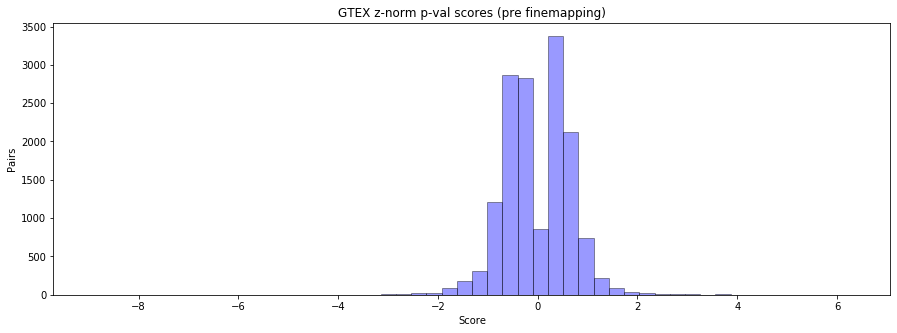

In [37]:
plt.rcParams['figure.figsize']=(15,5)
# seaborn histogram
sns.distplot(DAPG_comp['Z-score'], hist=True, kde=False, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('GTEX z-norm p-val scores (pre finemapping)')
plt.xlabel('Score')
plt.ylabel('Pairs')

Text(0, 0.5, 'Pairs')

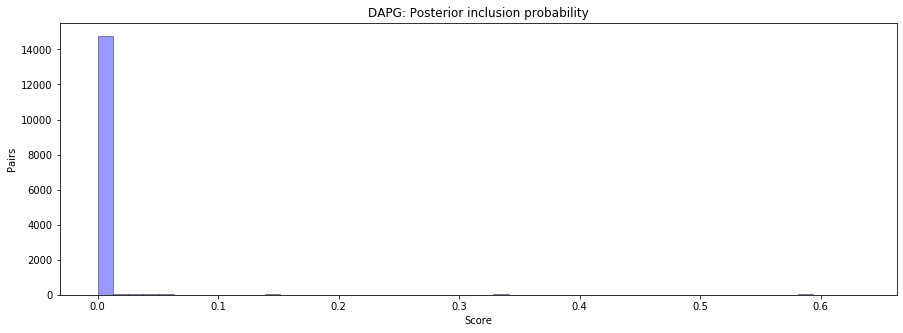

In [38]:
plt.rcParams['figure.figsize']=(15,5)
# seaborn histogram
sns.distplot(DAPG_comp['DAPG-pip'], hist=True, kde=False, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('DAPG: Posterior inclusion probability')
plt.xlabel('Score')
plt.ylabel('Pairs')

Text(0, 0.5, 'Pairs')

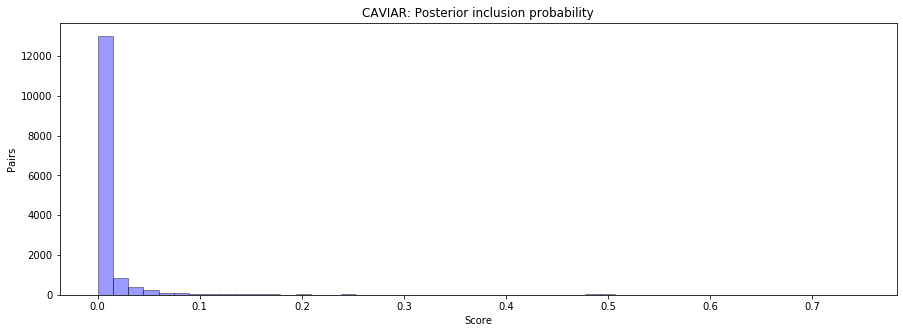

In [39]:
plt.rcParams['figure.figsize']=(15,5)
# seaborn histogram
sns.distplot(DAPG_comp['caviar-pip'], hist=True, kde=False, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('CAVIAR: Posterior inclusion probability')
plt.xlabel('Score')
plt.ylabel('Pairs')

Text(0, 0.5, 'Pairs')

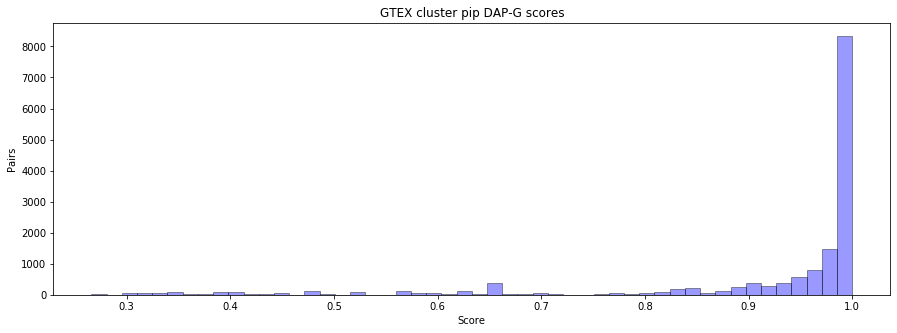

In [40]:
plt.rcParams['figure.figsize']=(15,5)
# seaborn histogram
sns.distplot(DAPG_comp['cluster_pip'], hist=True, kde=False, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('GTEX cluster pip DAP-G scores')
plt.xlabel('Score')
plt.ylabel('Pairs')

Text(0, 0.5, 'Pairs')

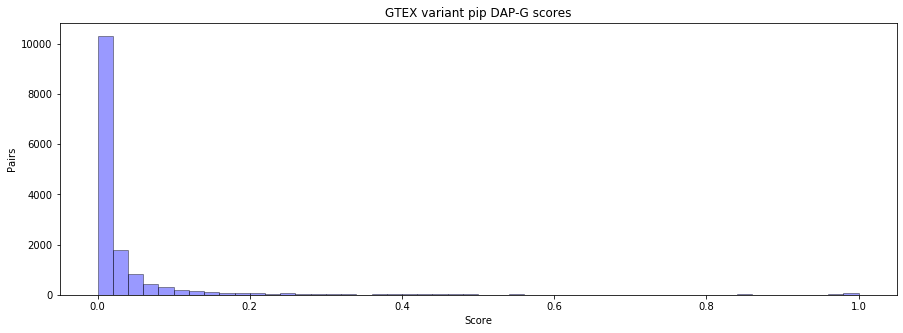

In [41]:
plt.rcParams['figure.figsize']=(15,5)
# seaborn histogram
sns.distplot(DAPG_comp['variant_pip'], hist=True, kde=False, color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('GTEX variant pip DAP-G scores')
plt.xlabel('Score')
plt.ylabel('Pairs')

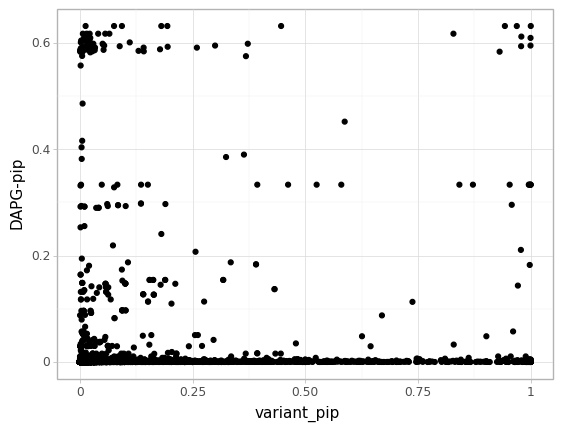

<ggplot: (2964420014062)>

In [42]:
(
    ggplot(DAPG_comp,aes(x='variant_pip'))
    +geom_point(aes(y='DAPG-pip'))
    +theme_light()
)

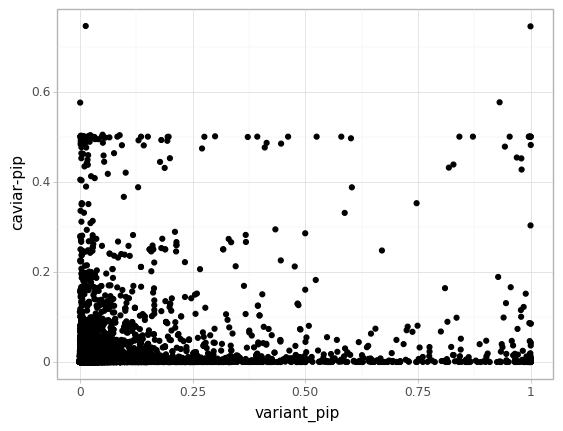

<ggplot: (2964415612715)>

In [43]:
(
    ggplot(DAPG_comp,aes(x='variant_pip'))
    +geom_point(aes(y='caviar-pip'))
    +theme_light()
)

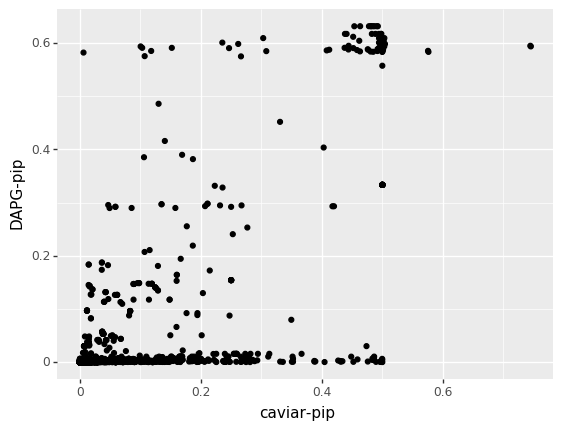

<ggplot: (2964420120083)>

In [45]:
(
    ggplot(DAPG_comp,aes(x='caviar-pip',y='DAPG-pip'))
    +geom_point()
)

In [204]:
scaler = MinMaxScaler()

In [46]:
CAVIAR=pd.read_csv('/nfs/research1/zerbino/jhidalgo/inteql_GTEX_v8/data/original-data/GTEX/pre-finemapped/GTEx_v8_finemapping_CAVIAR/CAVIAR_Results_v8_GTEx_LD_GM12878.txt',sep='\t',skiprows=1,names=('Tissue gene_id eqtl_pos chr pos CAVIAR_variant_pip').split())

In [47]:
CAVIAR['gene_id']=CAVIAR['gene_id'].str.split('.',expand=True)[0]

In [48]:
DAPG_comp['eqtl_pos']=DAPG_comp['variant_id'].str.lstrip('chr').str.rsplit('_',3,expand=True)[0]

In [49]:
CAVIAR

,Tissue,gene_id,eqtl_pos,chr,pos,CAVIAR_variant_pip
0,Cells_EBV-transformed_lymphocytes,ENSG00000174574,1_38973972,1,38973972,0.084977
1,Cells_EBV-transformed_lymphocytes,ENSG00000174574,1_38976606,1,38976606,0.085185
2,Cells_EBV-transformed_lymphocytes,ENSG00000174574,1_39062332,1,39062332,0.033925
3,Cells_EBV-transformed_lymphocytes,ENSG00000174574,1_39030645,1,39030645,0.033758
4,Cells_EBV-transformed_lymphocytes,ENSG00000174574,1_39052806,1,39052806,0.033758
...,...,...,...,...,...,...
239945,Cells_EBV-transformed_lymphocytes,ENSG00000241973,22_20858368,22,20858368,0.019717
239946,Cells_EBV-transformed_lymphocytes,ENSG00000241973,22_20838053,22,20838053,0.019697
239947,Cells_EBV-transformed_lymphocytes,ENSG00000241973,22_20832577,22,20832577,0.019697
239948,Cells_EBV-transformed_lymphocytes,ENSG00000241973,22_20763736,22,20763736,0.019695


In [50]:
CAVI_DAPG_comp=DAPG_comp.merge(CAVIAR.drop(columns=['chr','Tissue','pos']))

In [51]:
CAVI_DAPG_comp

,gene_id,Description,GM12878-Median-Expression,variant_id,tss_distance,ma_samples,ma_count,maf,pval_nominal,slope,...,chr,pos,Z-score,DAPG-pip,caviar-pip,caviar-Causal_Post._Prob.,cluster_pip,variant_pip,eqtl_pos,CAVIAR_variant_pip
0,ENSG00000127054,INTS11,45.01730,chr1_1368047_ACT_A_b38,43356,43,55,0.187075,8.969620e-07,-0.424147,...,1,1368047,1.172034,0.293357,2.069770e-01,1.340070e-02,0.989,0.003245,1_1368047,0.019351
1,ENSG00000242485,MRPL20,98.80240,chr1_1407232_G_C_b38,-81,48,57,0.193878,7.079920e-10,0.277412,...,1,1407232,-1.000000,0.333332,5.000000e-01,6.201490e-03,0.999,0.999400,1_1407232,0.998973
2,ENSG00000189339,SLC35E2B,29.70380,chr1_1658830_C_G_b38,-33898,58,66,0.224490,2.208720e-31,-0.933308,...,1,1658830,0.277368,0.001054,1.377300e-09,2.754600e-09,0.999,0.117000,1_1658830,0.514681
3,ENSG00000227775,RP1-283E3.4,7.70082,chr1_1658866_G_A_b38,-65646,80,101,0.343537,2.394200e-29,0.908132,...,1,1658866,-0.204954,0.001216,7.003290e-03,1.253460e-02,1.000,0.247300,1_1658866,0.419382
4,ENSG00000227775,RP1-283E3.4,7.70082,chr1_1659220_A_G_b38,-65292,80,101,0.343537,2.394200e-29,0.908132,...,1,1659220,-0.204954,0.001216,7.003290e-03,1.253460e-02,1.000,0.247300,1_1659220,0.419382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9931,ENSG00000219665,CTD-2006C1.2,5.91929,chr19_11943821_A_C_b38,-43796,15,15,0.051020,1.147700e-07,-1.022650,...,19,11943821,0.395737,0.001664,2.243170e-01,4.473430e-01,0.962,0.002775,19_11943821,0.023675
9932,ENSG00000096996,IL12RB1,16.54800,chr19_18086825_G_A_b38,-12119,62,70,0.238095,4.295180e-14,-0.495412,...,19,18086825,0.409637,0.000930,1.640310e-02,2.057650e-02,1.000,0.113200,19_18086825,0.264151
9933,ENSG00000096996,IL12RB1,16.54800,chr19_18090277_CGA_C_b38,-8667,62,70,0.238095,4.295180e-14,-0.495412,...,19,18090277,0.409637,0.000930,1.640310e-02,2.057650e-02,1.000,0.295600,19_18090277,0.262494
9934,ENSG00000096996,IL12RB1,16.54800,chr19_18091302_G_T_b38,-7642,62,70,0.238095,4.295180e-14,-0.495412,...,19,18091302,0.409637,0.000930,1.640310e-02,2.057650e-02,1.000,0.295600,19_18091302,0.263173


In [52]:
CAVI_DAPG_comp.iloc[:,-6:].drop(columns=['eqtl_pos'])

,caviar-pip,caviar-Causal_Post._Prob.,cluster_pip,variant_pip,CAVIAR_variant_pip
0,2.069770e-01,1.340070e-02,0.989,0.003245,0.019351
1,5.000000e-01,6.201490e-03,0.999,0.999400,0.998973
2,1.377300e-09,2.754600e-09,0.999,0.117000,0.514681
3,7.003290e-03,1.253460e-02,1.000,0.247300,0.419382
4,7.003290e-03,1.253460e-02,1.000,0.247300,0.419382
...,...,...,...,...,...
9931,2.243170e-01,4.473430e-01,0.962,0.002775,0.023675
9932,1.640310e-02,2.057650e-02,1.000,0.113200,0.264151
9933,1.640310e-02,2.057650e-02,1.000,0.295600,0.262494
9934,1.640310e-02,2.057650e-02,1.000,0.295600,0.263173


In [55]:
CAVI_DAPG_comp.iloc[:,-8:].drop(columns=['eqtl_pos']).corr()

,Z-score,DAPG-pip,caviar-pip,caviar-Causal_Post._Prob.,cluster_pip,variant_pip,CAVIAR_variant_pip
Z-score,1.000000,-0.030596,-0.009223,0.041575,0.054166,-0.011334,-0.021463
DAPG-pip,-0.030596,1.000000,0.733925,0.459469,-0.059520,0.129333,0.115675
caviar-pip,-0.009223,0.733925,1.000000,0.725878,-0.095614,0.176216,0.128947
caviar-Causal_Post._Prob.,0.041575,0.459469,0.725878,1.000000,-0.045648,0.043935,0.014335
cluster_pip,0.054166,-0.059520,-0.095614,-0.045648,1.000000,0.062370,0.100337
variant_pip,-0.011334,0.129333,0.176216,0.043935,0.062370,1.000000,0.680818
CAVIAR_variant_pip,-0.021463,0.115675,0.128947,0.014335,0.100337,0.680818,1.000000


In [58]:
imp_val=CAVI_DAPG_comp.iloc[:,-8:].drop(columns=['eqtl_pos']).columns

In [59]:
imp_val

Index(['Z-score', 'DAPG-pip', 'caviar-pip', 'caviar-Causal_Post._Prob.',
       'cluster_pip', 'variant_pip', 'CAVIAR_variant_pip'],
      dtype='object')

In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [67]:
sqrt(mean_squared_error(CAVI_DAPG_comp['variant_pip'], CAVI_DAPG_comp['DAPG-pip']))

0.1540078484939648

In [68]:
sqrt(mean_squared_error(CAVI_DAPG_comp['variant_pip'], CAVI_DAPG_comp['caviar-pip']))

0.14906461713446154

In [69]:
sqrt(mean_squared_error(CAVI_DAPG_comp['CAVIAR_variant_pip'], CAVI_DAPG_comp['DAPG-pip']))

0.13938739567190883

In [70]:
sqrt(mean_squared_error(CAVI_DAPG_comp['CAVIAR_variant_pip'], CAVI_DAPG_comp['caviar-pip']))

0.1357369335499255

# Data above 0.1 pip

In [78]:
data=CAVI_DAPG_comp[CAVI_DAPG_comp['variant_pip']>0.2]

In [79]:
print(sqrt(mean_squared_error(data['variant_pip'], data['DAPG-pip'])),
sqrt(mean_squared_error(data['variant_pip'], data['caviar-pip'])),
sqrt(mean_squared_error(data['CAVIAR_variant_pip'], data['DAPG-pip'])),
sqrt(mean_squared_error(data['CAVIAR_variant_pip'], data['caviar-pip'])))

0.5416779719256671 0.5265257199687574 0.40980443831834906 0.4034760841715852


In [80]:
data=CAVI_DAPG_comp[CAVI_DAPG_comp['CAVIAR_variant_pip']>0.2]

In [81]:
print(sqrt(mean_squared_error(data['variant_pip'], data['DAPG-pip'])),
sqrt(mean_squared_error(data['variant_pip'], data['caviar-pip'])),
sqrt(mean_squared_error(data['CAVIAR_variant_pip'], data['DAPG-pip'])),
sqrt(mean_squared_error(data['CAVIAR_variant_pip'], data['caviar-pip'])))

0.4991128757027369 0.48625092996947805 0.5211756157338686 0.5129154480682805
